<a href="https://colab.research.google.com/github/YashM246/LGMVIP-Data-Science-Intern/blob/main/Iris_Flower_Classification_LGMVIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# Importing the Iris Dataset


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

# Data Exploration

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

![Types of Iris Flowers](https://drive.google.com/uc?export=view&id=1QAt3HDqUSBlJP6tDny0N7ZXhlSAHPNo2)

# Data Visualization and Preprocessing

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

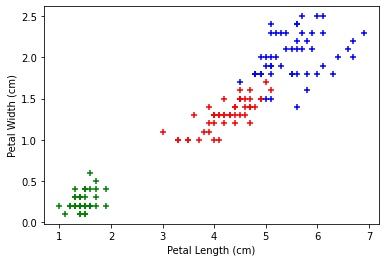

In [ ]:
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], color='green', marker='+')
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], color='red', marker='+')
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], color='blue', marker='+')

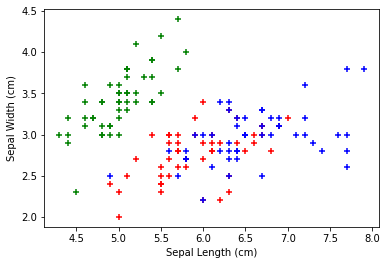

In [ ]:
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color='green', marker='+')
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color='red', marker='+')
plt.scatter(df2["sepal length (cm)"], df2["sepal width (cm)"], color='blue', marker='+')

In [ ]:
scaler = MinMaxScaler()

df_ = df.drop(['petal length (cm)','petal width (cm)','sepal width (cm)', 'sepal length (cm)'], axis='columns')

scaler.fit(df[['petal length (cm)']])
df_['Petal_Length'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df_['Petal_Width'] = scaler.transform(df[['petal width (cm)']])

scaler.fit(df[['sepal length (cm)']])
df_['Sepal_Length'] = scaler.transform(df[['sepal length (cm)']])

scaler.fit(df[['sepal width (cm)']])
df_['Sepal_Width'] = scaler.transform(df[['sepal width (cm)']])

df_.head()

,target,flower_name,Petal_Length,Petal_Width,Sepal_Length,Sepal_Width
0,0,setosa,0.067797,0.041667,0.222222,0.625000
1,0,setosa,0.067797,0.041667,0.166667,0.416667
2,0,setosa,0.050847,0.041667,0.111111,0.500000
3,0,setosa,0.084746,0.041667,0.083333,0.458333
4,0,setosa,0.067797,0.041667,0.194444,0.666667


# Splitting into Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

x = df_.drop(['target','flower_name'], axis='columns')
y = df_['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
len(x_train)

112

In [ ]:
len(x_test)

38

# Decision Tree Classifier

In [ ]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()

In [ ]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(x_test, y_test)

1.0

In [ ]:
y_pred = DT.predict(x_test)

Text(42.0, 0.5, 'Actual')

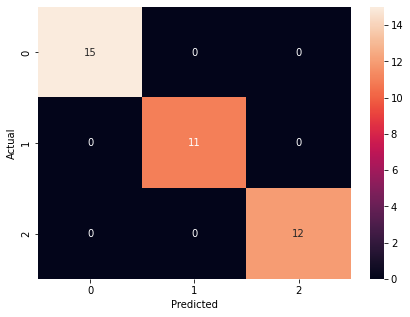

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel("Actual")

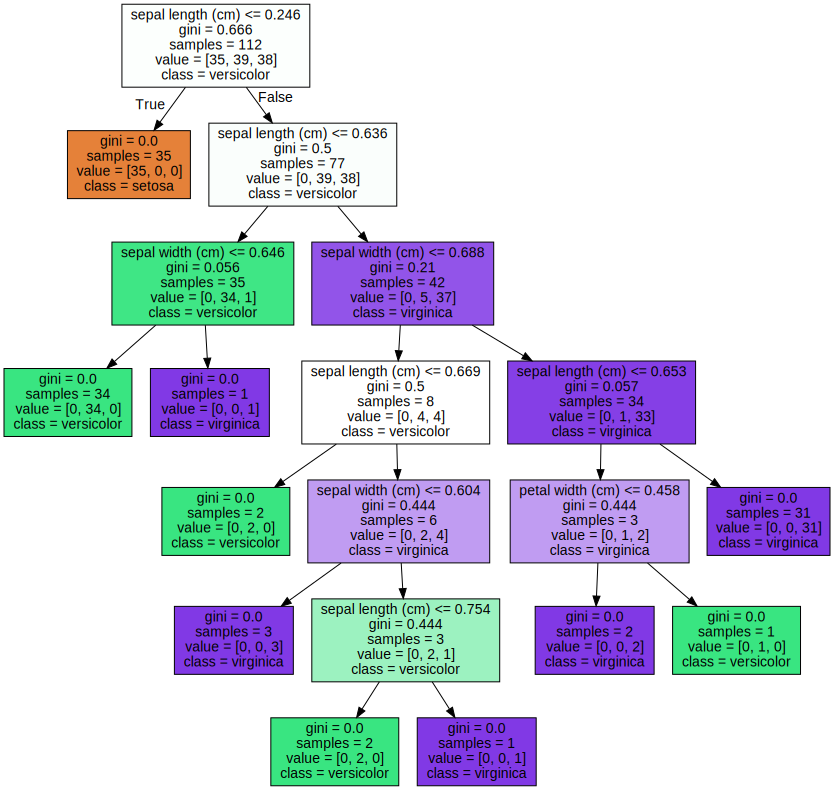

In [ ]:
import graphviz

graph_data = tree.export_graphviz(DT, out_file=None,
                                  feature_names = iris.feature_names,
                                  class_names = iris.target_names,
                                  filled = True)

graph = graphviz.Source(graph_data, format="png")
graph